<a href="https://colab.research.google.com/github/unnatihasija1/SpotifyClustering/blob/main/SpotifyClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.6/238.6 KB 25.5 MB/s eta 0:00:00


In [2]:
pip install hana_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 59.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import spotipy
import os
import spotipy.util as util
import json
import hana_ml
from hana_ml.algorithms.pal import clustering
from hana_ml.algorithms.pal import partition
from hana_ml.docstore import create_collection_from_elements as jsoncollection
import hana_ml.dataframe as dataframe

In [4]:
from sklearn import manifold
import matplotlib.pyplot as plt


In [5]:
import numpy as np
import pandas as pd
import logging
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns

In [6]:
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

In [7]:
cid = '0f5d88c5170c44f7b1d33d073ad1396b'
secret = 'e658f11d1ab147a482da2f6a846b70b9'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)


In [9]:
# setup hana connection
conn = dataframe.ConnectionContext(address='14a552ee-5028-4a45-933e-28455029a1c7.hna0.prod-eu10.hanacloud.ondemand.com', 
                                   port=443,
                                   user='JSONDEMO', 
                                   password='Hana2023!',  
                                   encrypt='true'
                                   )

In [11]:
# Create the HANA dataframe in the structure of the specified table
df_remote = conn.table(table = 'TRACKSUH', schema = 'SPOTIFY')
df = df_remote.head(10).collect()
#df_data = pd.read_csv('/content/spotify.csv')
df_remote.dtypes()
df_remote.describe().collect()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10 non-null     object 
 1   NAME          10 non-null     object 
 2   POPULARITY    10 non-null     int64  
 3   DURATION_MS   10 non-null     int64  
 4   DANCEABILITY  10 non-null     float64
 5   ACOUSTICNESS  10 non-null     float64
 6   GENRE         10 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 688.0+ bytes


In [ ]:
#Feature selection(FS) is a dimensionality reduction technique, which selects a subset of relevant features 
#for model construction, thus reducing the memory storage and improving computational efficiency while 
#avoiding significant loss of information.

In [10]:
from hana_ml.visualizers.eda import EDAVisualizer

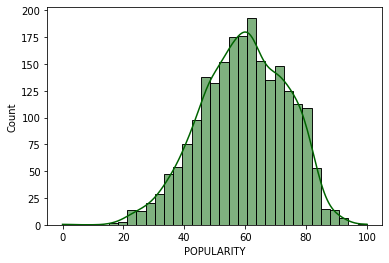

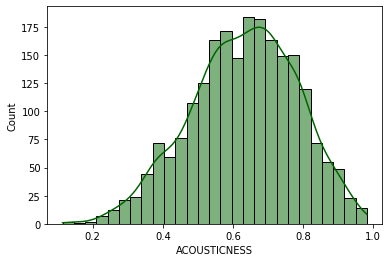

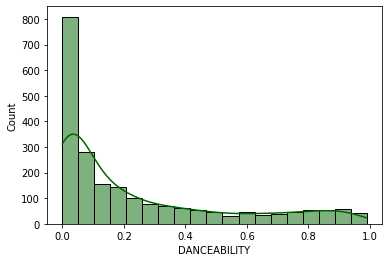

In [11]:
#EDA: Exploratory data analysis
def DrawHistogram(column_name):
    sns.histplot(data=df_remote.collect(),x=column_name, kde=True, color='darkgreen')
    plt.show()
features = ['POPULARITY', 'ACOUSTICNESS', 'DANCEABILITY'] 
for i in features:
    DrawHistogram(i)


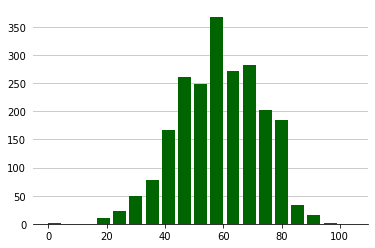

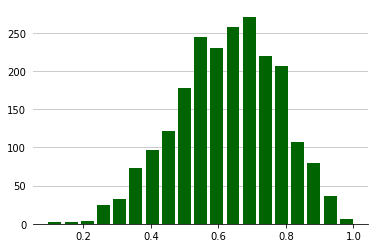

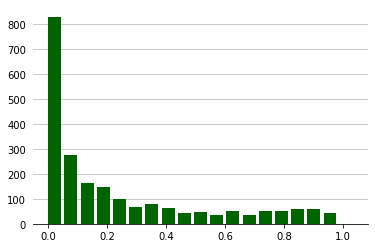

In [12]:
def DrawDistributionPlot(column_name):
  f = plt.figure()
  ax1 = f.add_subplot(111) # 111 refers to 1x1 grid, 1st subplot
  eda = EDAVisualizer(ax1)
  eda.distribution_plot(data=df_remote, column=column_name,  color='darkgreen', bins=19)
features1 = ['POPULARITY', 'ACOUSTICNESS', 'DANCEABILITY'] 
for i in features1:
    DrawDistributionPlot(i) 

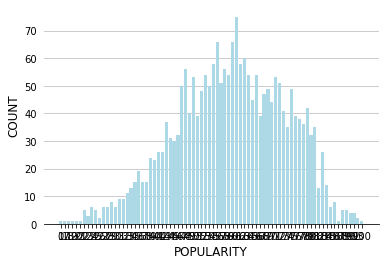

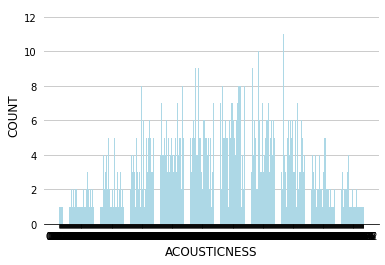

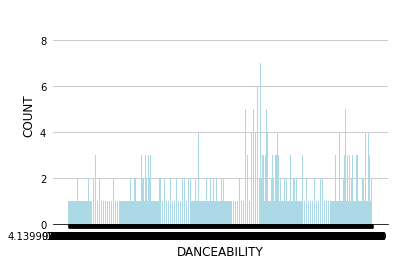

In [13]:
def BarPlot(column_name):
  f = plt.figure()
  ax1 = f.add_subplot(111) # 111 refers to 1x1 grid, 1st subplot
  eda = EDAVisualizer(ax1)
  eda.bar_plot(data=df_remote, column=column_name, color='lightblue', aggregation={'COLUMN':'count'})

features1 = ['POPULARITY', 'ACOUSTICNESS', 'DANCEABILITY'] 

for i in features1:
    BarPlot(i) 

(<Axes: xlabel='DANCEABILITY', ylabel='ACOUSTICNESS'>,
 BANDING_X  0.000  0.198  0.396  0.594  0.792  0.990  1.188
 BANDING_Y                                                 
 1.044        NaN    NaN    NaN    NaN    NaN    NaN    NaN
 0.870       82.0   18.0    5.0    5.0    NaN    NaN    NaN
 0.696      467.0  116.0   52.0   24.0   12.0    NaN    NaN
 0.522      557.0  118.0   71.0   79.0   77.0    NaN    NaN
 0.348      219.0   51.0   30.0   54.0   77.0    NaN    NaN
 0.174       33.0    6.0   10.0    6.0   22.0    NaN    NaN
 0.000        2.0    1.0    NaN    NaN    NaN    NaN    NaN)

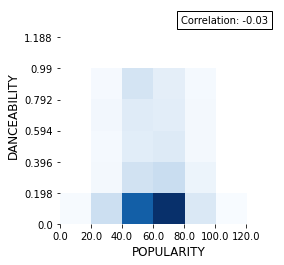

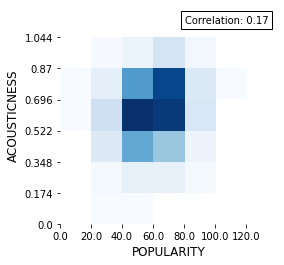

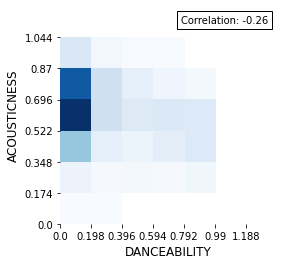

In [14]:
#Correlation
#How does popularity rate with danceability or acousticness
f = plt.figure()
ax2 = f.add_subplot(111) # 111 refers to 1x1 grid, 1st subplot
eda = EDAVisualizer(ax2)
eda.scatter_plot(data=df_remote, x='POPULARITY',y='DANCEABILITY', x_bins=5, y_bins=5 )

f1 = plt.figure()
ax3 = f1.add_subplot(111) # 111 refers to 1x1 grid, 1st subplot
eda = EDAVisualizer(ax3)
eda.scatter_plot(data=df_remote, x='POPULARITY',y='ACOUSTICNESS', x_bins=5, y_bins=5 )

f2 = plt.figure()
ax4 = f2.add_subplot(111) # 111 refers to 1x1 grid, 1st subplot
eda = EDAVisualizer(ax4)
eda.scatter_plot(data=df_remote, x='DANCEABILITY',y='ACOUSTICNESS', x_bins=5, y_bins=5 )

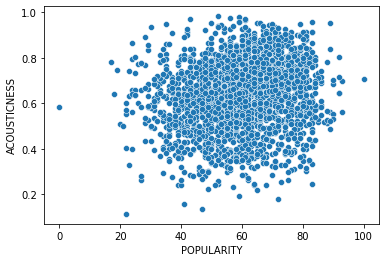

In [15]:
sns.scatterplot(x='POPULARITY', y='ACOUSTICNESS', data=df_remote.collect());

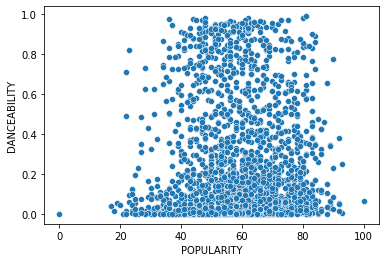

In [16]:
sns.scatterplot(x='POPULARITY', y='DANCEABILITY', data=df_remote.collect());

(-0.5, 999.5, 859.5, -0.5)

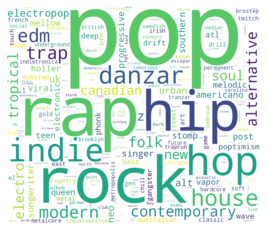

In [17]:
from hana_ml.visualizers.word_cloud import WordCloud
#stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white", max_words=500,
                          max_font_size=400, random_state=42, width=1000,
                          height=860, margin=2).build(data=df_remote,
                                                      #stopwords = stopwords
                                                      content_column="GENRE",
                                                      lang='EN')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [18]:
df_unique = df_remote.drop_duplicates(subset=['ID'])
print(df_unique.shape)
#print(df_unique.head(10).collect())
train, test, valid = partition.train_test_val_split(data = df_unique, training_percentage = 0.7, 
                                                    testing_percentage = 0.3, validation_percentage = 0)
#print(train, test, valid)
#print(train['NAME', 'POPULARITY', 'ACOUSTICNESS', 'DANCEABILITY'].collect())

[2193, 7]


In [19]:
training_data = df_unique.collect().sample(frac=0.8, random_state=25)
testing_data = df_unique.collect().drop(training_data.index)

#training_df = dataframe.create_dataframe_from_pandas(connection_context=conn, pandas_df=training_data, table_name=TOPALL2)
#testing_df = dataframe.create_dataframe_from_pandas(connection_context=conn, pandas_df=testing_data)

#ratio = 0.75
#train_size = int(df_unique.shape[0]*ratio)
#print(df_unique)
#training_data = df_unique[0:train_size]
#testing_data = df_unique[train_size:]
features =  ['POPULARITY', 'ACOUSTICNESS', 'DANCEABILITY'] 
#label = ['POPULARITY']

In [20]:
kmeans = clustering.KMeans(thread_ratio=0.2, n_clusters=5, distance_level='euclidean',  #cosine
                           max_iter=10, tol=1.0E-6, category_weights=0.5, normalization='min_max')
predictions = kmeans.fit_predict(train, 'ID', features)
p = predictions.collect()
print(p)
res=kmeans.fit(test, 'ID', features)

                          ID  CLUSTER_ID  DISTANCE  SLIGHT_SILHOUETTE
0     3CLSHJv5aUROAN2vfOyCOh           3  0.185153           0.005548
1     7hakBrWzzouKXpopdzq9DI           1  0.209739           0.645165
2     6a8LfgC5aAaHNhsQcGQY1r           0  0.157567           0.187930
3     3GdWfmQBiiJrDUvSZS1bGv           3  0.173941           0.210914
4     4JeOesjcWWlprTAvucDSJX           4  0.325745           0.054725
...                      ...         ...       ...                ...
1530  5R691ipUYRDYW6ehapjoj6           3  0.151502           0.358000
1531  6LLb6rVMgQnGNZwwHSxTzn           1  0.235228           0.732184
1532  72iyEnh9p6PoyJoEnAJDjO           0  0.159733           0.176521
1533  4qgMPzf9QOETWQFUcFkHD4           1  0.110507           0.809472
1534  0ycteGsaJrAlhOh1hEBH5X           1  0.240343           0.529078

[1535 rows x 4 columns]


In [21]:
pip install pyodbc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.8/329.8 KB 19.0 MB/s eta 0:00:00


In [22]:
from hana_ml.algorithms.pal.tsne import TSNE
#import pyodbc as pyodbc

tsne = TSNE(n_iter=50, n_components=2, angle=0,
                object_frequency=50, random_state=30)
train_df = train.collect()
#print(train_df.shape)
#X = train.collect().select_dtypes(np.number)
#topics_pivot = train.pivot_table(columns='ID', values=['ACOUSTICNESS', 'DANCEABILITY', 'POPULARITY'], index='ID', aggfunc='AVG')
#res, stats, obj = tsne.fit_predict(topics_pivot, 'ID')


In [23]:
#number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
# 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import plotly.express as px

train_df = train.collect()
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
X = train_df.select_dtypes(np.number)
#print(X)
embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=embedding)
print(projection)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1535 samples in 0.002s...
[t-SNE] Computed neighbors for 1535 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1535
[t-SNE] Computed conditional probabilities for sample 1535 / 1535
[t-SNE] Mean sigma: 0.277627
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.385963
[t-SNE] KL divergence after 1000 iterations: 0.820641
              x          y
0    -30.634954 -19.455950
1     37.181374 -26.053610
2     -0.323066   7.392025
3    -30.841757  -7.182559
4     14.504046  -6.654447
...         ...        ...
1530  -9.169535  -9.254350
1531  27.121557 -31.471479
1532 -27.178555 -18.262342
1533  17.819822 -26.859503
1534  26.995180 -13.535544

[1535 rows x 2 columns]


In [25]:
class_colors = {0: '#999999', 1: '#377eb8', 2: '#ff7f00', 3: '#E3CF57', 4: '#53868B'}

In [26]:
projection['GENRE'] = train_df['GENRE']
projection['NAME'] = train_df['NAME']
#class_colors = {0: '#999999', 1: '#377eb8', 2: '#ff7f00', 3: '#00001', 4: '#989898'}
pred = predictions.collect()
predictions_colors = [class_colors[p] for p in pred['CLUSTER_ID'].values]
fig = px.scatter(
    projection, x='x', y='y', color=predictions_colors, hover_data=['GENRE', 'NAME'],title='Clusters of songs')
fig.show()

In [27]:
def plot_kmeans_results(data_set, features, predictions):

    #class_colors = {0: '#999999', 1: '#377eb8', 2: '#ff7f00'}
    pred = predictions.collect()
    predictions_colors = [class_colors[p] for p in pred['CLUSTER_ID'].values]

    red = plt.Line2D(range(1), range(1), c='w', marker='o', markerfacecolor='#999999', label='1', markersize=5, alpha=0.7)
    blue = plt.Line2D(range(1), range(1), c='w', marker='o', markerfacecolor='#377eb8', label='2', markersize=5, alpha=0.7)
    black = plt.Line2D(range(1), range(1), c='w', marker='o', markerfacecolor='#ff7f00', label='3', markersize=5, alpha=0.7)
    anotherc = plt.Line2D(range(1), range(1), c='w', marker='o', markerfacecolor='#E3CF57', label='4', markersize=5, alpha=0.7)
    anotherc1 = plt.Line2D(range(1), range(1), c='w', marker='o', markerfacecolor='#53868B', label='5', markersize=5, alpha=0.7)

    for x, y in itertools.combinations(features, 2):
        plt.figure(figsize=(7,4))
        plt.scatter(data_set[[x]].collect(), data_set[[y]].collect(), c=predictions_colors, alpha=0.6, s=70)
        plt.grid()
        plt.xlabel(x, fontsize=15)
        plt.ylabel(y, fontsize=15)
        plt.tick_params(labelsize=15)
        plt.legend(handles=[red, blue, black, anotherc, anotherc1])
        plt.show()

    %matplotlib notebook

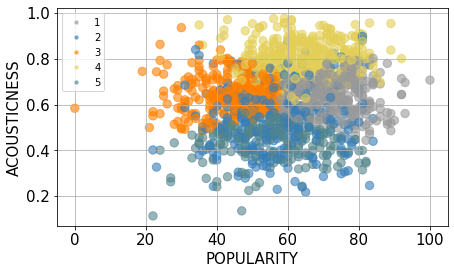

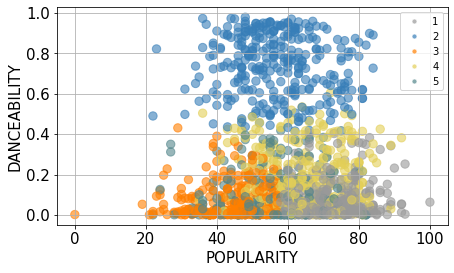

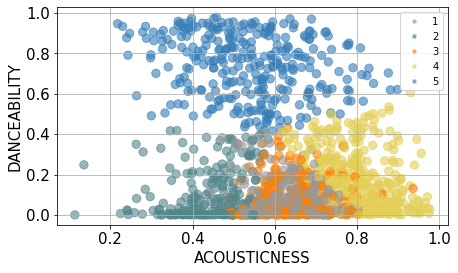

In [28]:
%matplotlib inline
plot_kmeans_results(train, features, predictions)

In [29]:
df = df_remote.collect()
df_f = df_remote[features]
print(df_f)

In [30]:
#get information on songs data
def get_song_data(song, spotify_data):
  #print(song)
  song_data = df[(df.NAME == song)].iloc[0]
  #newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]
  print('Fetching song information from local dataset')
  return song_data


In [31]:
def get_mean_vector(song_list, spotify_data):
    song_vectors = []
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['NAME']))
            continue
        song_vector = song_data[features].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))#nd-array where n is number of songs in list. It contains all numerical vals of songs in sep list.
    #print(f'song_matrix {song_matrix}')
    return np.mean(song_matrix, axis=0) # mean of each ele in list, returns 1-d array


In [32]:
from hana_ml.algorithms.pal.auto_ml import Preprocessing as pp

In [33]:
#Based on the analysis and visualizations, it’s clear that similar genres tend to have data points 
#that are located close to each other while similar types of songs are also clustered together.
#Similar genres will sound similar and similar songs will have similar audio features. 
#We can use this idea to build a recommendation system by taking the data points of the songs a user has 
#listened to and recommending songs corresponding to nearby data points.

In [34]:
'''Gets song list as input. 
Get mean vectors of numerical features of the input. 
Scale the mean-input as well as dataset numerical features.
calculate eculidean distance b/w mean-input and dataset.
Fetch the top 10 songs with maximum similarity.'''
from scipy.spatial.distance import cdist
def recommend_songs( song_list, spotify_data, n_songs=10):
    
    #metadata_cols = ['NAME', 'YEAR', 'ARTISTS']
    metadata_cols = ['NAME']
    #song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    print(song_center)
    #print(f'song_center {song_center}')
    #scaler = kmeans.steps[0][1] # StandardScalar()
    scaled_data = pp(name="FeatureNormalizer").fit_transform(data=df_f)
    #print(scaled_data.collect().shape)
    #song_center = song_center.reshape(1, -1)
    print(song_center.shape)
    #scaled_data = kmeans.transform(spotify_data[features])
    #scaled_song_center = pp(name="FeatureNormalizer").fit_transform(data=song_center.reshape(1, -1))
    #scaled_song_center = kmeans.transform(song_center.reshape(1, -1))
    song_center = np.array([song_center])
    print(song_center.shape,scaled_data.collect().shape)
    distances = cdist(scaled_data.collect(), song_center, 'cosine')
    
    #print(f'distances {distances}')
    index = list(np.argsort(distances)[:, :n_songs][0])
    print(distances)
    rec_songs = spotify_data.iloc[index]
    print(rec_songs)
    #rec_songs = rec_songs[~rec_songs['NAME'].isin(song_list['NAME'])]
    #return rec_songs[metadata_cols].to_dict(orient='records')
    return rec_songs

In [35]:
a = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])
b = np.array([[ 0.1,  0.2,  0.4]])
print(a.shape, b.shape)
distances = cdist(a, b, 'cosine')
print(distances)

(8, 3) (1, 3)
[[       nan]
 [0.12712844]
 [0.56356422]
 [0.0741799 ]
 [0.78178211]
 [0.22848325]
 [0.53708995]
 [0.1180829 ]]


In [36]:
recommend_songs(['For an Evening'],  df_remote.collect())

Fetching song information from local dataset
[47.0 0.65 0.968]
(3,)
(1, 3) (2194, 3)
[[0.98426514]
 [0.98444425]
 [0.98533464]
 ...
 [0.98168661]
 [0.97975584]
 [0.98616088]]
                       ID   NAME  POPULARITY  DURATION_MS  DANCEABILITY  \
0  3szqC0lxrJdhn3eW6FfFfo  Chulo          73       120413        0.0792   

   ACOUSTICNESS                                              GENRE  
0         0.836  ["neoperreo", "rap catala", "rap latina", "tra...  


,ID,NAME,POPULARITY,DURATION_MS,DANCEABILITY,ACOUSTICNESS,GENRE
0,3szqC0lxrJdhn3eW6FfFfo,Chulo,73,120413,0.0792,0.836,"[""neoperreo"", ""rap catala"", ""rap latina"", ""tra..."


In [37]:
#Feature selection(FS) is a dimensionality reduction technique, which selects a subset of relevant features 
#for model construction, thus reducing the memory storage and improving computational efficiency while 
#avoiding significant loss of information.

In [38]:
#create Model storage
from hana_ml.model_storage import ModelStorage 
MODEL_SCHEMA = 'SPOTIFY' # HANA schema in which models are to be saved 
model_storage = ModelStorage(connection_context=conn, schema = MODEL_SCHEMA) 
kmeans.name = 'KMeans Clustering' 
model_storage.save_model(model=kmeans, if_exists = 'replace')